In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
# 파일 경로를 각자 컴퓨터 환경에 맞게 수정하세요!
file_path = '/content/drive/MyDrive/부리부리데마왕/dataset/'

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
import plotly.graph_objs as go
import plotly
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, QuantileTransformer

##데이터 불러오기

In [ ]:
# 데이터 불러오기
data = pd.read_csv(file_path + 'creditcard_data.csv')

data.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
data.shape

(284806, 31)

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# 데이터 전처리
- UP Sampling
  - SMOTE - 소수 클래스 샘플의 이웃을 활용하여 새로운 합성 데이터를 생성하는 방법으로 이는 원래 데이터를 보간하여 새로운 샘플을 생성하는 방법
  - ADASYN - SMOTE와 유사하지만 샘플링을 적응적으로 수행하여 밀집된 지역에 더 많은 합성 데이터를 생성
- Data Scaling
  - Scale 1 - 양의 왜도를 띄는 변수 SquaredTransform, 음의 왜도를 띄는 변수 LogTransform, 그 외 변수 MinMaxTransform
  - Scale 2 - 양의 왜도를 띄는 변수 QuantileTransform, 음의 왜도를 띄는 변수 BoxcoxTransform, 그 외 변수 StandardTransform  
  - Scale 3 - Time만 스케일링
- PCA

#SMOTE


In [ ]:
# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 특징과 클래스 분리
X_sm = data.drop('Class', axis=1)
y_sm = data['Class']

# 데이터 업샘플링 수행
X_resampled, y_resampled = smote.fit_resample(X_sm, y_sm)

# 업샘플링된 데이터의 클래스 분포 확인
resampled_class_distribution = pd.Series(y_resampled).value_counts()
print(resampled_class_distribution)

data_SMOTE = pd.concat([X_resampled, y_resampled], axis=1)
data_SMOTE.shape

0    284314
1    284314
Name: Class, dtype: int64


(568628, 31)

## Case 1 SMOTE + Scale 1

In [ ]:
data_SMOTE_case1=data_SMOTE.copy()
#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (data_SMOTE_case1[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if data_SMOTE_case1[col].min() <= 0:
            data_SMOTE_case1[col] += abs(data_SMOTE_case1[col].min()) + 0.1

for col in pro_skew:
    data_SMOTE_case1[col + '_log_transformed'] = np.log(data_SMOTE_case1[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
  data_SMOTE_case1[col + '_squared_transformed'] = data_SMOTE_case1[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    data_SMOTE_case1[col + '_minmax_transformed'] = scaler.fit_transform(data_SMOTE_case1[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행

# 적용 다한 column은 drop

data_SMOTE_case1.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

print(data_SMOTE_case1.head())

X_case1 = data_SMOTE_case1.drop('Class',axis=1)
Y_case1 = data_SMOTE_case1['Class']

# 데이터 나누기
X_case1_train, X_case1_test, Y_case1_train, Y_case1_test = train_test_split(X_case1, Y_case1, test_size=0.3, random_state=25)

   Time  Amount  Class  V3_log_transformed  V5_log_transformed  \
0   0.0  149.62      0            3.931079            4.731847   
1   0.0    2.69      0            3.883460            4.735350   
2   1.0  378.66      0            3.915991            4.730393   
3   1.0  123.50      0            3.916385            4.734732   
4   2.0   69.99      0            3.911509            4.731240   

   V7_log_transformed  V9_log_transformed  V10_log_transformed  \
0            3.781842            2.631734             3.209999   
1            3.774563            2.586157             3.199542   
2            3.794336            2.486523             3.214703   
3            3.781797            2.497086             3.204100   
4            3.789859            2.663876             3.236375   

   V12_log_transformed  V14_log_transformed  ...  V21_squared_transformed  \
0             2.899547             2.944605  ...                 0.000335   
1             2.988151             2.953375  ...    

## Case 2 SMOTE + Scale 2

In [ ]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def boxcox_transform(data, columns, lambda_value):
    if lambda_value == 0:
        return np.log(data[columns])
    else:
        return (data[columns] ** lambda_value - 1) / lambda_value

data_SMOTE_case2 = data_SMOTE.copy()

X_case2 = data_SMOTE_case2.drop('Class',axis=1)
Y_case2 = data_SMOTE_case2['Class']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']

for col in left_skewed_cols:
    # 음의 왜도를 가진 열의 최소값이 0보다 작거나 같은 경우 양수로 변환
    if X_case2[col].min() <= 0:
        X_case2[col] += abs(X_case2[col].min()) + 1

# train_scaler
smtrain_left_skewed = boxcox_transform(X_case2, left_skewed_cols, 0.01)
smtrain_right_skewed = quantileTransform(X_case2, right_skewed_cols)

train_transformed_sm = pd.concat([X_case2, smtrain_left_skewed.add_suffix('_box_Transform'), smtrain_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import StandardScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
standardScaler = StandardScaler()

for col in s_columns:
    train_transformed_sm[col + '_standard_Transform'] = standardScaler.fit_transform(train_transformed_sm[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed_sm.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)

data_SMOTE_case2=train_transformed_sm
print(data_SMOTE_case2.head())


X_case2_train, X_case2_test, Y_case2_train, Y_case2_test = train_test_split(data_SMOTE_case2, Y_case2, test_size=0.3, random_state=25)

   Time  Amount  V3_box_Transform  V5_box_Transform  V7_box_Transform  \
0   0.0  149.62          4.027578          4.853866          3.875344   
1   0.0    2.69          3.978933          4.857511          3.867934   
2   1.0  378.66          4.012158          4.852354          3.888063   
3   1.0  123.50          4.012561          4.856868          3.875298   
4   2.0   69.99          4.007578          4.853235          3.883505   

   V9_box_Transform  V10_box_Transform  V12_box_Transform  V14_box_Transform  \
0          2.731112           3.298922           2.991783           3.036054   
1          2.687208           3.288501           3.078944           3.044684   
2          2.591748           3.303612           3.028085           3.043545   
3          2.601833           3.293043           3.033919           3.037257   
4          2.762157           3.325229           3.052426           2.993334   

   V15_box_Transform  ...  V21_qt_Transform  V1_standard_Transform  \
0         

## CASE 3 SMOTE + Scale 3


In [ ]:
data_SMOTE_case3=data_SMOTE.copy()
#Time만 스케일링
X_case3 = data_SMOTE_case3.drop(['Class','Time'],axis=1).values
Y_case3 = data_SMOTE_case3['Class'].values
TS = data_SMOTE_case3['Time'].values

#TS 스케일링
scale=StandardScaler()
TS_scaled = scale.fit_transform(TS.reshape(-1, 1))  # TS를 2D 배열로 변환하여 스케일링


# TS_scaled를 DataFrame으로 변환
TS_df = pd.DataFrame(TS_scaled, columns=['Time_Scaled'])

# X_TS와 TS_df를 concat하여 새로운 DataFrame을 생성
X_case3 = pd.concat([pd.DataFrame(X_case3, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']), TS_df], axis=1)

X_case3_train, X_case3_test, Y_case3_train, Y_case3_test = train_test_split(X_case3, Y_case3, test_size = 0.30, random_state = 25)


print(X_case3_train.shape,Y_case3_train.shape)
print(X_case3_test.shape,Y_case3_test.shape)
print(X_case3)

(398039, 30) (398039,)
(170589, 30) (170589,)
              V1        V2        V3        V4        V5        V6        V7  \
0      -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1       1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2      -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3      -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4      -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
...          ...       ...       ...       ...       ...       ...       ...   
568623 -3.528214  4.214903 -4.659617  4.969213 -3.945075 -1.323282 -6.469481   
568624 -5.316626  2.012519 -6.348490  2.460052 -1.938313 -2.474485 -4.015509   
568625  0.243673  1.392556 -1.684040  3.828573 -1.185475 -0.343660 -2.530405   
568626 -0.316288  1.852639 -2.288492  2.679946 -0.378768 -0.392332 -1.713874   
568627  0.069184  2.486966 -5.471828  3.780035 -0.289525 -1.407425 -1.4673

# ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

# ADASYN 모델 초기화 및 샘플링 전략 설정
adasyn = ADASYN(sampling_strategy={1: 250000}, random_state=42)

# 특징과 클래스 분리
X_ad = data.drop('Class', axis=1)
y_ad = data['Class']

# ADASYN을 사용하여 오버샘플링

X_resampled, y_resampled = adasyn.fit_resample(X_ad, y_ad)

# 새로운 데이터프레임 생성
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X_ad.columns), pd.Series(y_resampled, name='Class')], axis=1)

Fraud = balanced_data[balanced_data['Class']==1]
Normal = data[data['Class']==0]
Fraud.shape
# Fraud.head()

(249883, 31)

In [ ]:
data_ADASYN = pd.concat([Fraud, Normal], ignore_index=True)
data_ADASYN.shape

(534197, 31)

## Case 4 ADASYN + Scale 1

In [ ]:
data_ADASYN_case4=data_ADASYN.copy()
#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (data_ADASYN_case4[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if data_ADASYN_case4[col].min() <= 0:
            data_ADASYN_case4[col] += abs(data_ADASYN_case4[col].min()) + 0.1

for col in pro_skew:
    data_ADASYN_case4[col + '_log_transformed'] = np.log(data_ADASYN_case4[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
 data_ADASYN_case4[col + '_squared_transformed'] = data_ADASYN_case4[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    data_ADASYN_case4[col + '_minmax_transformed'] = scaler.fit_transform(data_ADASYN_case4[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행

# 적용 다한 column은 drop

data_ADASYN_case4.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

print(data_ADASYN_case4.head())

X_case4 = data_ADASYN_case4.drop('Class',axis=1)
Y_case4 = data_ADASYN_case4['Class']

# 데이터 나누기
X_case4_train, X_case4_test, Y_case4_train, Y_case4_test = train_test_split(X_case4, Y_case4, test_size=0.3, random_state=25)

     Time  Amount  Class  V3_log_transformed  V5_log_transformed  \
0   406.0    0.00      1            3.846219            4.730226   
1   472.0  529.00      1            3.902257            4.746697   
2  4462.0  239.93      1            3.872572            4.727580   
3  6986.0   59.00      1            3.824999            4.724864   
4  7519.0    1.00      1            3.786936            4.766162   

   V7_log_transformed  V9_log_transformed  V10_log_transformed  \
0            3.716491            2.376205             3.087217   
1            3.783799            2.584987             3.171771   
2            3.789167            2.587449             3.142550   
3            3.692897            2.586733             2.990047   
4            3.814866            2.505625             3.101928   

   V12_log_transformed  V14_log_transformed  ...  V21_squared_transformed  \
0             2.765300             2.709720  ...                 0.267529   
1             2.905839             2.869

## Case 5 ADASYN + Scale 2

In [ ]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def boxcox_transform(data, columns, lambda_value):
    if lambda_value == 0:
        return np.log(data[columns])
    else:
        return (data[columns] ** lambda_value - 1) / lambda_value

data_ADASYN_case5 = data_ADASYN.copy()

X_case5 = data_ADASYN_case5.drop('Class',axis=1)
Y_case5 = data_ADASYN_case5['Class']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']

for col in left_skewed_cols:
    # 음의 왜도를 가진 열의 최소값이 0보다 작거나 같은 경우 양수로 변환
    if X_case5[col].min() <= 0:
        X_case5[col] += abs(X_case5[col].min()) + 1

# train_scaler
smtrain_left_skewed = boxcox_transform(X_case5, left_skewed_cols, 0.01)
smtrain_right_skewed = quantileTransform(X_case5, right_skewed_cols)

train_transformed_sm = pd.concat([X_case5, smtrain_left_skewed.add_suffix('_box_Transform'), smtrain_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import StandardScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
standardScaler = StandardScaler()

for col in s_columns:
    train_transformed_sm[col + '_standard_Transform'] = standardScaler.fit_transform(train_transformed_sm[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed_sm.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)

data_ADASYN_case5=train_transformed_sm
print(data_ADASYN_case5.head())


X_case5_train, X_case5_test, Y_case5_train, Y_case5_test = train_test_split(data_ADASYN_case5, Y_case2, test_size=0.3, random_state=25)

     Time  Amount  V3_box_Transform  V5_box_Transform  V7_box_Transform  \
0   406.0    0.00          3.940934          4.852180          3.808890   
1   472.0  529.00          3.998127          4.869317          3.877335   
2  4462.0  239.93          3.967819          4.849428          3.882800   
3  6986.0   59.00          3.919300          4.846603          3.784931   
4  7519.0    1.00          3.880529          4.889575          3.908975   

   V9_box_Transform  V10_box_Transform  V12_box_Transform  V14_box_Transform  \
0          2.486926           3.176881           2.860565           2.806557   
1          2.686083           3.260850           2.997958           2.961995   
2          2.688451           3.231793           2.607836           2.974259   
3          2.687762           3.080814           2.195186           2.632530   
4          2.609993           3.191466           2.750113           2.684042   

   V15_box_Transform  ...  V21_qt_Transform  V1_standard_Transform  

## CASE 6 ADASYN + Scale 3

In [ ]:
data_ADASYN_case6=data_ADASYN.copy()

#Time만 스케일링
X_case6 = data_ADASYN_case6.drop(['Class','Time'],axis=1).values
Y_case6 = data_ADASYN_case6['Class'].values
TS = data_ADASYN_case6['Time'].values
#TS 스케일링
scale=StandardScaler()
TS_scaled = scale.fit_transform(TS.reshape(-1, 1))  # TS를 2D 배열로 변환하여 스케일링


# TS_scaled를 DataFrame으로 변환
TS_df = pd.DataFrame(TS_scaled, columns=['Time_Scaled'])

# X_TS와 TS_df를 concat하여 새로운 DataFrame을 생성
X_case6 = pd.concat([pd.DataFrame(X_case6, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']), TS_df], axis=1)

print(X_case6)

               V1         V2        V3        V4        V5        V6  \
0       -2.312227   1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       -3.043541  -3.157307  1.088463  2.288644  1.359805 -1.064823   
2       -2.303350   1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3       -4.397974   1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4        1.234235   3.019740 -4.304597  4.732795  3.624201 -1.357746   
...           ...        ...       ...       ...       ...       ...   
534192   0.120316   0.931005 -0.546012 -0.745097  1.130314 -0.235973   
534193 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
534194  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
534195   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
534196  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   

              V7        V8        V9       V10  ...       V21       V22  \
0      -2.537387  1.391657 -2.770089 -2.772272  ...  0.51723

In [ ]:
X_case6_train, X_case6_test, Y_case6_train, Y_case6_test = train_test_split(X_case6, Y_case6, test_size = 0.30, random_state = 25)


print(X_case6_train.shape,Y_case6_train.shape)
print(X_case6_test.shape,Y_case6_test.shape)

(373937, 30) (373937,)
(160260, 30) (160260,)


## KNN

In [ ]:
X_train_list = [X_case1_train,X_case2_train,X_case3_train]
X_test_list = [X_case1_test,X_case2_test,X_case3_test]
Y_train_list = [Y_case1_train,Y_case2_train,Y_case3_train]
Y_test_list = [Y_case1_test,Y_case2_test,Y_case3_test]

for i in range(3):
  X_train = X_train_list[i]
  X_test = X_test_list[i]
  Y_train = Y_train_list[i]
  Y_test = Y_test_list[i]

  # 실험할 K 값 범위 설정
  k_values = list(range(1, 21,2))  # 1부터 20까지의 K 값으로 실험

  # 결과를 저장할 리스트 초기화
  accuracy_results = []

  # 각 K 값에 대한 모델 훈련 및 평가
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

  # 시각화
  plt.figure(figsize=(10, 6))
  plt.plot(k_values, accuracy_results, marker='o', linestyle='-', color='b')
  plt.title('accuracy rate of change')
  plt.xlabel('K value')
  plt.ylabel('acuuracy')
  plt.xticks(k_values)
  plt.grid(True)
  plt.show()

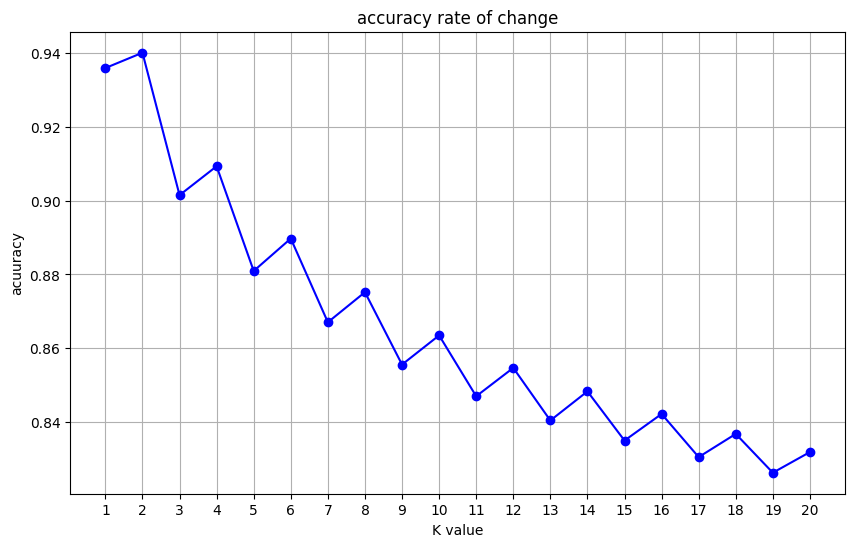

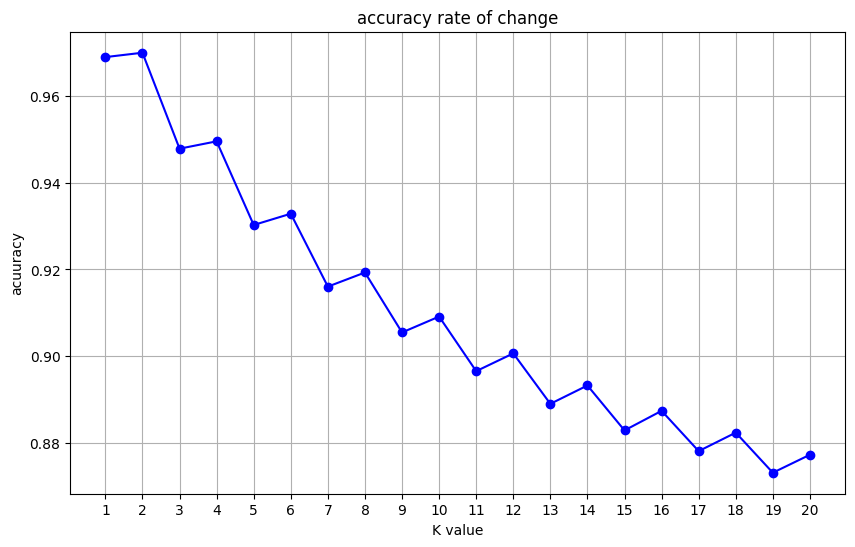

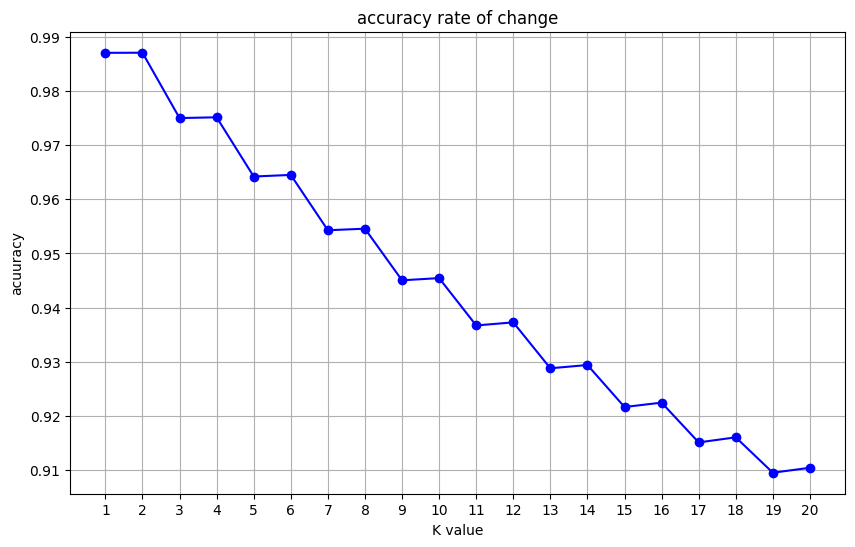

IndexError: ignored

In [ ]:
X_train_list2 = [X_case4_train,X_case5_train,X_case6_train]
X_test_list2 = [X_case4_test,X_case5_test,X_case6_test]
Y_train_list2 = [Y_case4_train,Y_case5_train,Y_case6_train]
Y_test_list2 = [Y_case4_test,Y_case5_test,Y_case6_test]

for i in range(3):
  X_train = X_train_list2[i]
  X_test = X_test_list2[i]
  Y_train = Y_train_list2[i]
  Y_test = Y_test_list2[i]

  # 실험할 K 값 범위 설정
  k_values = list(range(1, 21,2))  # 1부터 20까지의 K 값으로 실험

  # 결과를 저장할 리스트 초기화
  accuracy_results = []

  # 각 K 값에 대한 모델 훈련 및 평가
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

  # 시각화
  plt.figure(figsize=(10, 6))
  plt.plot(k_values, accuracy_results, marker='o', linestyle='-', color='b')
  plt.title('accuracy rate of change')
  plt.xlabel('K value')
  plt.ylabel('acuuracy')
  plt.xticks(k_values)
  plt.grid(True)
  plt.show()

In [ ]:
knn_case1 = KNeighborsClassifier(n_neighbors=9)
knn_case2 = KNeighborsClassifier(n_neighbors=9)
knn_case3 = KNeighborsClassifier(n_neighbors=9)
knn_case4 = KNeighborsClassifier(n_neighbors=9)
knn_case5 = KNeighborsClassifier(n_neighbors=9)
knn_case6 = KNeighborsClassifier(n_neighbors=9)

knn_case1.fit(X_case1_train, Y_case1_train)
knn_case2.fit(X_case2_train, Y_case2_train)
knn_case3.fit(X_case3_train, Y_case3_train)
knn_case4.fit(X_case4_train, Y_case4_train)
knn_case5.fit(X_case5_train, Y_case5_train)
knn_case6.fit(X_case6_train, Y_case6_train)

# 테스트 데이터로 예측
Y_pred_case1 = knn_case1.predict(X_case1_test)
Y_pred_case2 = knn_case2.predict(X_case2_test)
Y_pred_case3 = knn_case3.predict(X_case3_test)
Y_pred_case4 = knn_case4.predict(X_case4_test)
Y_pred_case5 = knn_case5.predict(X_case5_test)
Y_pred_case6 = knn_case6.predict(X_case6_test)



# 모델 평가
accuracy1 = accuracy_score(Y_case1_test, Y_pred_case1)
accuracy2 = accuracy_score(Y_case2_test, Y_pred_case2)
accuracy3 = accuracy_score(Y_case3_test, Y_pred_case3)
accuracy4 = accuracy_score(Y_case4_test, Y_pred_case4)
accuracy5 = accuracy_score(Y_case5_test, Y_pred_case5)
accuracy6 = accuracy_score(Y_case6_test, Y_pred_case6)
print(f"case1 (K = 9) 정확도: {accuracy1} \n case2 (K = 10) 정확도: {accuracy2} \n case3 (K = 10) 정확도: {accuracy3} \n case4 (K = 9) 정확도: {accuracy4} \n case5 (K = 10) 정확도: {accuracy5} \n case6 (K = 10) 정확도: {accuracy6}")

# 분류 보고서 출력
print("case1 분류 보고서:")
print(classification_report(Y_case1_test, Y_pred_case1))
print("case2 분류 보고서:")
print(classification_report(Y_case2_test, Y_pred_case2))
print("case3 분류 보고서:")
print(classification_report(Y_case3_test, Y_pred_case3))
print("case4 분류 보고서:")
print(classification_report(Y_case4_test, Y_pred_case4))
print("case5 분류 보고서:")
print(classification_report(Y_case5_test, Y_pred_case5))
print("case6 분류 보고서:")
print(classification_report(Y_case6_test, Y_pred_case6))

case1 (K = 9) 정확도: 0.9467667903557674 
 case2 (K = 10) 정확도: 0.8948642644015734 
 case3 (K = 10) 정확도: 0.9926196882565699 
 case4 (K = 9) 정확도: 0.9440721327842256 
 case5 (K = 10) 정확도: 0.892044178210408 
 case6 (K = 10) 정확도: 0.9924934481467615
case1 분류 보고서:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     85465
           1       0.95      0.95      0.95     85124

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

case2 분류 보고서:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     85465
           1       0.88      0.92      0.90     85124

    accuracy                           0.89    170589
   macro avg       0.90      0.89      0.89    170589
weighted avg       0.90      0.89      0.89    170589

case3 분류 보고서:
              precision    recall  f1-score   support

        

# PCA 진행 이유

In [ ]:
data_pca = pd.read_csv(file_path + 'pca_train_test.csv')
data_pca

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,target
0,-0.186803,-1.000143,0.745271,0.396115,-1.285372,-0.708153,0.114003,0.325531,0.592047,0.439203,...,0.884376,-0.557766,0.036501,0.809532,0.478148,0.135564,1.472248,0.428958,-0.381381,0
1,-0.705777,-0.671973,0.878802,0.384820,0.332147,0.265318,0.581809,-0.587116,0.875597,-0.961119,...,-0.536303,-0.159865,0.910140,0.123068,-0.891751,0.650127,0.867556,-0.841684,0.475563,0
2,3.973764,0.752199,-0.057570,0.722408,1.857562,-1.213780,0.526862,-1.335082,0.488178,-0.693094,...,0.431250,0.468316,0.554997,0.719100,-0.347534,0.322468,-0.220685,0.436515,-0.433111,0
3,1.025226,0.970736,0.634796,-0.730365,-0.767119,0.839303,0.244287,0.100426,0.462459,0.848337,...,-0.503240,0.372951,0.879522,0.369692,-0.584512,1.226589,-0.281516,-0.572916,0.434625,0
4,-0.892340,-0.479857,0.500884,-1.393628,0.103438,0.917956,-1.092323,0.107218,0.561216,0.387365,...,-0.379418,0.749823,0.204488,0.400505,0.618971,0.204516,-0.777073,0.554618,-0.069441,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284801,0.403169,0.402539,0.680315,-1.007532,2.098599,-1.277573,-0.646375,0.263997,0.781231,-0.454061,...,-0.410567,0.437024,0.627868,0.884708,0.772984,0.648746,-1.144199,0.589628,-0.273099,0
284802,-0.645635,-0.645760,0.370055,0.821711,-2.313645,-0.673857,0.365090,-1.252529,-0.886413,0.571019,...,-0.818363,0.809678,-2.978813,-3.835946,0.356766,-0.600699,-0.224977,0.767544,-0.854795,0
284803,-0.422941,0.331869,0.884928,0.401079,0.942990,-0.526874,-3.605100,0.052291,0.472184,0.005477,...,-0.103788,-0.729232,1.035139,0.383185,0.082624,-0.556574,-0.533770,0.598696,0.625018,0
284804,3.444423,-1.391055,-0.505879,0.415283,0.514673,-1.376723,-1.068739,0.129165,0.814837,0.994285,...,-0.546426,-0.742508,0.887634,-0.692838,0.431044,-3.674984,0.213256,0.937968,-0.285184,0


# 데이터 (재)전처리
- UP Sampling
  - SMOTE
  - ADASYN
- Data Scaling
  - Scale 1 - 양의 왜도를 띄는 변수 SquaredTransform, 음의 왜도를 띄는 변수 LogTransform, 그 외 변수 MinMaxTransform
  - Scale 2 - 양의 왜도를 띄는 변수 QuantileTransform, 음의 왜도를 띄는 변수 BoxcoxTransform, 그 외 변수 StandardTransform
  - Scale 3 -  스케일링 진행 X
- PCA

#SMOTE


In [ ]:
# SMOTE 객체 생성
smote = SMOTE(random_state=42)

# 특징과 클래스 분리
X_sm = data_pca.drop('target', axis=1)
y_sm = data_pca['target']

# 데이터 업샘플링 수행
X_resampled, y_resampled = smote.fit_resample(X_sm, y_sm)

# 업샘플링된 데이터의 클래스 분포 확인
resampled_class_distribution = pd.Series(y_resampled).value_counts()
print(resampled_class_distribution)

data_SMOTE = pd.concat([X_resampled, y_resampled], axis=1)
data_SMOTE.shape

0    284314
1    284314
Name: target, dtype: int64


(568628, 29)

## Case 1 SMOTE + Scale 1

In [ ]:
data_SMOTE_case7=data_SMOTE.copy()
#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (data_SMOTE_case7[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if data_SMOTE_case7[col].min() <= 0:
            data_SMOTE_case7[col] += abs(data_SMOTE_case7[col].min()) + 0.1

for col in pro_skew:
    data_SMOTE_case7[col + '_log_transformed'] = np.log(data_SMOTE_case7[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
  data_SMOTE_case7[col + '_squared_transformed'] = data_SMOTE_case7[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    data_SMOTE_case7[col + '_minmax_transformed'] = scaler.fit_transform(data_SMOTE_case7[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행

# 적용 다한 column은 drop

data_SMOTE_case7.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

print(data_SMOTE_case7.head())

X_case1 = data_SMOTE_case7.drop('target',axis=1)
Y_case1 = data_SMOTE_case7['target']

# 데이터 나누기
X_case7_train, X_case7_test, Y_case7_train, Y_case7_test = train_test_split(X_case7, Y_case7, test_size=0.3, random_state=25)

   target  V3_log_transformed  V5_log_transformed  V7_log_transformed  \
0       0            3.497852            3.317053            3.211946   
1       0            3.501885            3.374048            3.230613   
2       0            3.473256            3.424976            3.228439   
3       0            3.494503            3.335671            3.217180   
4       0            3.490429            3.366184            3.162138   

   V9_log_transformed  V10_log_transformed  V12_log_transformed  \
0            3.005139             3.224547             2.915893   
1            3.019086             3.167239             2.803769   
2            2.999981             3.178465             2.845195   
3            2.998699             3.240689             2.804290   
4            3.003610             3.222483             2.866141   

   V14_log_transformed  V15_log_transformed  V16_log_transformed  ...  \
0             2.474494             3.507461             2.918635  ...   
1           

## Case 2 SMOTE + Scale 2

In [ ]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def logTransform(data, columns):
    scaled_data = data[columns].apply(lambda x: np.log1p(x))
    return scaled_data

data_SMOTE_case8 = data_SMOTE.copy()

X_case8 = data_SMOTE_case8.drop('target',axis=1)
Y_case8 = data_SMOTE_case8['target']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']


if (X_case8[left_skewed_cols].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in left_skewed_cols:
        if X_case8[col].min() <= 0:
            X_case8[col] += abs(X_case8[col].min()) + 0.1


# train_scaler
smtrain_left_skewed = logTransform(X_case8, left_skewed_cols)
smtrain_right_skewed = quantileTransform(X_case8, right_skewed_cols)

train_transformed_sm = pd.concat([X_case8, smtrain_left_skewed.add_suffix('_log_Transform'), smtrain_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import MinMaxScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
minmaxScaler = MinMaxScaler()

for col in s_columns:
    train_transformed_sm[col + '_MM_Transform'] = minmaxScaler.fit_transform(train_transformed_sm[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed_sm.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)

data_SMOTE_case8=train_transformed_sm
print(data_SMOTE_case8.head())


X_case8_train, X_case8_test, Y_case8_train, Y_case8_test = train_test_split(data_SMOTE_case8, Y_case8, test_size=0.3, random_state=25)


   V3_log_Transform  V5_log_Transform  V7_log_Transform  V9_log_Transform  \
0          3.527665          3.352671          3.251434          3.053483   
1          3.531580          3.407726          3.269385          3.066776   
2          3.503800          3.457007          3.267293          3.048569   
3          3.524415          3.370643          3.256466          3.047348   
4          3.520461          3.400123          3.203601          3.052027   

   V10_log_Transform  V12_log_Transform  V14_log_Transform  V15_log_Transform  \
0           3.263550           2.968633           2.555342           3.536994   
1           3.208496           2.862586           2.724432           3.582686   
2           3.219271           2.901692           2.811186           3.536359   
3           3.279079           2.863078           2.740991           3.536163   
4           3.261565           2.921498           2.809234           3.570114   

   V16_log_Transform  V17_log_Transform  ...  V21_

## CASE 3 SMOTE + Scale 3


In [ ]:
#Scaling 진행 X
data_SMOTE_case9=data_SMOTE.copy()

X_case9 = data_SMOTE_case9.drop('target',axis=1).values
Y_case9 = data_SMOTE_case9['target'].values

X_case9_train, X_case9_test, Y_case9_train, Y_case9_test = train_test_split(X_case9, Y_case9, test_size = 0.30, random_state = 25)
# X_TS_train['Time'] = scale.fit_transform(X_TS_train.reshape(1,-1))
# X_TS_test['Time'] = scale.fit_transform(X_TS_test.reshape(1,-1))

print(X_case9_train.shape,Y_case9_train.shape)
print(X_case9_test.shape,Y_case9_test.shape)

(398039, 28) (398039,)
(170589, 28) (170589,)


# ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN

# ADASYN 모델 초기화 및 샘플링 전략 설정
adasyn = ADASYN(sampling_strategy={1: 250000}, random_state=42)

# 특징과 클래스 분리
X_ad = data_pca.drop('target', axis=1)
y_ad = data_pca['target']

# ADASYN을 사용하여 오버샘플링

X_resampled, y_resampled = adasyn.fit_resample(X_ad, y_ad)

# 새로운 데이터프레임 생성
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X_ad.columns), pd.Series(y_resampled, name='target')], axis=1)

Fraud = balanced_data[balanced_data['target']==1]
Normal = data_pca[data_pca['target']==0]
Fraud.shape
# Fraud.head()

(249822, 29)

In [ ]:
data_ADASYN = pd.concat([Fraud, Normal], ignore_index=True)
data_ADASYN.shape

(534136, 29)

## Case 4 ADASYN + Scale 1

In [ ]:
data_ADASYN_case10=data_ADASYN.copy()
#꼬리가 오른쪽으로 긴 변수
pro_skew = ['V3', 'V5', 'V7','V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24','V27', 'V28']
neg_skew = ['V2', 'V11', 'V19', 'V20', 'V21']
normal_col = ['V1', 'V4','V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26' ]

# pro_skew 로그변환 적용
# 변수 내의 최소값이 0 이하인 경우, 모든 값을 조금 올려서 로그 변환이 가능하도록 조정
if (data_ADASYN_case10[pro_skew].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in pro_skew:
        if data_ADASYN_case10[col].min() <= 0:
            data_ADASYN_case10[col] += abs(data_ADASYN_case10[col].min()) + 0.1

for col in pro_skew:
    data_ADASYN_case10[col + '_log_transformed'] = np.log(data_ADASYN_case10[col])


# neg_skew는 음의 왜도.
# 제곱 변환 적용
for col in neg_skew:
 data_ADASYN_case10[col + '_squared_transformed'] = data_ADASYN_case10[col] ** 2

#normal_col
# 정규화할 변수 리스트
scaler = MinMaxScaler()
for col in normal_col:
    data_ADASYN_case10[col + '_minmax_transformed'] = scaler.fit_transform(data_ADASYN_case10[col].values.reshape(-1, 1)) # 2차원 배열로 바꿔서 실행

# 적용 다한 column은 drop

data_ADASYN_case10.drop(columns = pro_skew+neg_skew+normal_col, inplace = True)

print(data_ADASYN_case10.head())

X_case4 = data_ADASYN_case10.drop('target',axis=1)
Y_case4 = data_ADASYN_case10['target']

# 데이터 나누기
X_case10_train, X_case10_test, Y_case10_train, Y_case10_test = train_test_split(X_case10, Y_case10, test_size=0.3, random_state=25)

   target  V3_log_transformed  V5_log_transformed  V7_log_transformed  \
0       1            3.505565            3.383792            3.190363   
1       1            3.513058            3.367627            3.174770   
2       1            3.495578            3.322953            3.078943   
3       1            3.493652            3.336109            3.231477   
4       1            3.447307            3.366029            3.235569   

   V9_log_transformed  V10_log_transformed  V12_log_transformed  \
0            3.010109             3.238308             2.820128   
1            2.941991             3.237927             2.813773   
2            2.950504             3.221166             2.816597   
3            3.021727             3.225068             2.893456   
4            2.984441             3.220460             3.039289   

   V14_log_transformed  V15_log_transformed  V16_log_transformed  ...  \
0             2.758485             3.549007             2.903524  ...   
1           

## Case 5 ADASYN + Scale 2

In [ ]:
def quantileTransform(data, columns):
    qt = QuantileTransformer()
    scaled_data = pd.DataFrame(qt.fit_transform(data[columns]), columns=columns)
    return scaled_data

def logTransform(data, columns):
    scaled_data = data[columns].apply(lambda x: np.log1p(x))
    return scaled_data

data_ADASYN_case11 = data_ADASYN.copy()

X_case11 = data_ADASYN_case11.drop('target',axis=1)
Y_case11 = data_ADASYN_case11['target']

left_skewed_cols = ['V3', 'V5', 'V7', 'V9', 'V10', 'V12', 'V14', 'V15', 'V16', 'V17', 'V18', 'V24', 'V27', 'V28']
right_skewed_cols = ['V2', 'V11', 'V19', 'V20', 'V21']


if (X_case11[left_skewed_cols].min() <= 0).any():  # .any()를 추가하여 Series 전체에서 하나라도 조건을 만족하는지 확인
    for col in left_skewed_cols:
        if X_case11[col].min() <= 0:
            X_case11[col] += abs(X_case11[col].min()) + 0.1


# train_scaler
smtrain_left_skewed = logTransform(X_case11, left_skewed_cols)
smtrain_right_skewed = quantileTransform(X_case11, right_skewed_cols)

train_transformed_ad = pd.concat([X_case11, smtrain_left_skewed.add_suffix('_log_Transform'), smtrain_right_skewed.add_suffix('_qt_Transform')], axis=1)

# 그 외 수치
# minmax? standard?
from sklearn.preprocessing import MinMaxScaler
s_columns = ['V1', 'V4', 'V6', 'V8', 'V13', 'V22', 'V23', 'V25', 'V26']
minmaxScaler = MinMaxScaler()

for col in s_columns:
    train_transformed_ad[col + '_MM_Transform'] = minmaxScaler.fit_transform(train_transformed_ad[[col]])

#train_transformed --> 전처리가 진행된 데이터
train_transformed_ad.drop(columns =left_skewed_cols + right_skewed_cols + s_columns, inplace = True)

data_ADASYN_case11=train_transformed_ad
print(data_ADASYN_case11.head())

X_case11_train, X_case11_test, Y_case11_train, Y_case11_test = train_test_split(data_ADASYN_case11, Y_case11, test_size=0.3, random_state=25)

   V3_log_Transform  V5_log_Transform  V7_log_Transform  V9_log_Transform  \
0          3.535153          3.417148          3.230696          3.058220   
1          3.542428          3.401518          3.215723          2.993407   
2          3.525458          3.358365          3.123924          3.001495   
3          3.523590          3.371066          3.270216          3.069295   
4          3.478642          3.399973          3.274153          3.033772   

   V10_log_Transform  V12_log_Transform  V14_log_Transform  V15_log_Transform  \
0           3.276788           2.878018           2.819945           3.577354   
1           3.276422           2.872021           2.805949           3.581718   
2           3.260299           2.874686           2.749367           3.581587   
3           3.264051           2.947361           2.863836           3.581631   
4           3.259620           3.086047           2.826264           3.591951   

   V16_log_Transform  V17_log_Transform  ...  V21_

## CASE 6 ADASYN + Scale 3

In [ ]:
data_ADASYN_case12=data_ADASYN.copy()

X_case12 = data_ADASYN_case12.drop('target',axis=1).values
Y_case12 = data_ADASYN_case12['target'].values

X_case12_train, X_case12_test, Y_case12_train, Y_case12_test = train_test_split(X_case12, Y_case12, test_size = 0.30, random_state = 25)
# X_TS_train['Time'] = scale.fit_transform(X_TS_train.reshape(1,-1))
# X_TS_test['Time'] = scale.fit_transform(X_TS_test.reshape(1,-1))

print(X_case12_train.shape,Y_case12_train.shape)
print(X_case12_test.shape,Y_case12_test.shape)

(373895, 28) (373895,)
(160241, 28) (160241,)


## KNN

In [ ]:
X_train_list = [X_case7_train,X_case8_train,X_case9_train]
X_test_list = [X_case7_test,X_case8_test,X_case9_test]
Y_train_list = [Y_case7_train,Y_case8_train,Y_case9_train]
Y_test_list = [Y_case7_test,Y_case8_test,Y_case9_test]

for i in range(3):
  X_train = X_train_list[i]
  X_test = X_test_list[i]
  Y_train = Y_train_list[i]
  Y_test = Y_test_list[i]

  # 실험할 K 값 범위 설정
  k_values = list(range(1, 21,2))  # 1부터 20까지의 K 값으로 실험

  # 결과를 저장할 리스트 초기화
  accuracy_results = []

  # 각 K 값에 대한 모델 훈련 및 평가
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

  # 시각화
  plt.figure(figsize=(10, 6))
  plt.plot(k_values, accuracy_results, marker='o', linestyle='-', color='b')
  plt.title('accuracy rate of change')
  plt.xlabel('K value')
  plt.ylabel('acuuracy')
  plt.xticks(k_values)
  plt.grid(True)
  plt.show()

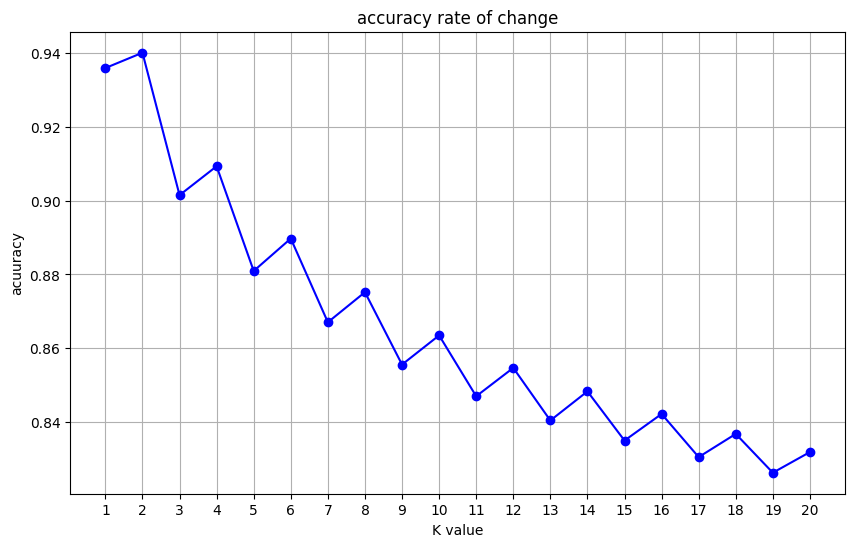

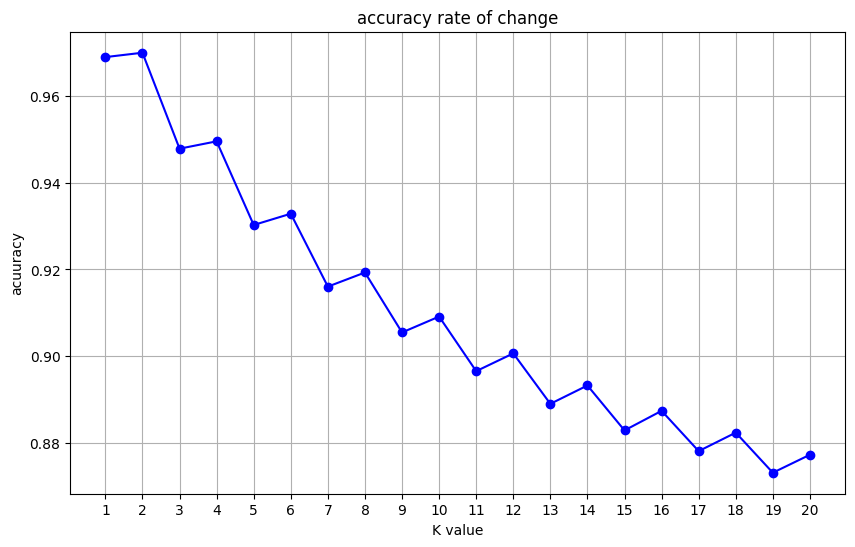

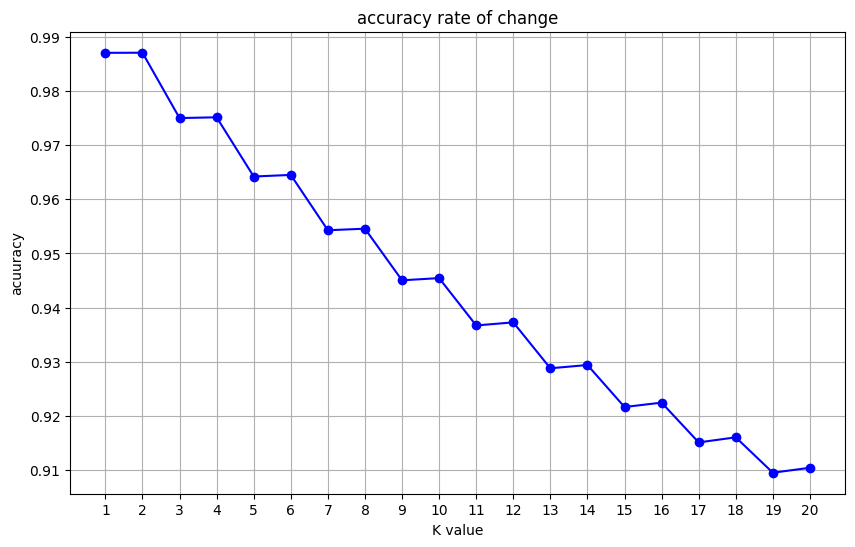

IndexError: ignored

In [ ]:
X_train_list2 = [X_case10_train,X_case11_train,X_case12_train]
X_test_list2 = [X_case10_test,X_case11_test,X_case12_test]
Y_train_list = [Y_case10_train,Y_case11_train,Y_case12_train]
Y_test_list = [Y_case10_test,Y_case11_test,Y_case12_test]

for i in range(3):
  X_train = X_train_list2[i]
  X_test = X_test_list2[i]
  Y_train = Y_train_list2[i]
  Y_test = Y_test_list2[i]

  # 실험할 K 값 범위 설정
  k_values = list(range(1, 21,2))  # 1부터 20까지의 K 값으로 실험

  # 결과를 저장할 리스트 초기화
  accuracy_results = []

  # 각 K 값에 대한 모델 훈련 및 평가
  for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_results.append(accuracy)

  # 시각화
  plt.figure(figsize=(10, 6))
  plt.plot(k_values, accuracy_results, marker='o', linestyle='-', color='b')
  plt.title('accuracy rate of change')
  plt.xlabel('K value')
  plt.ylabel('acuuracy')
  plt.xticks(k_values)
  plt.grid(True)
  plt.show()

In [ ]:
knn_case7 = KNeighborsClassifier(n_neighbors=9)
knn_case8 = KNeighborsClassifier(n_neighbors=9)
knn_case9 = KNeighborsClassifier(n_neighbors=9)
knn_case10 = KNeighborsClassifier(n_neighbors=9)
knn_case11 = KNeighborsClassifier(n_neighbors=9)
knn_case12 = KNeighborsClassifier(n_neighbors=9)

knn_case7.fit(X_case7_train, Y_case7_train)
knn_case8.fit(X_case8_train, Y_case8_train)
knn_case9.fit(X_case9_train, Y_case9_train)
knn_case10.fit(X_case10_train, Y_case10_train)
knn_case11.fit(X_case11_train, Y_case11_train)
knn_case12.fit(X_case12_train, Y_case12_train)

# 테스트 데이터로 예측
Y_pred_case7 = knn_case7.predict(X_case7_test)
Y_pred_case8 = knn_case8.predict(X_case8_test)
Y_pred_case9 = knn_case9.predict(X_case9_test)
Y_pred_case10 = knn_case10.predict(X_case10_test)
Y_pred_case11 = knn_case11.predict(X_case11_test)
Y_pred_case12 = knn_case12.predict(X_case12_test)



# 모델 평가
accuracy1 = accuracy_score(Y_case1_test, Y_pred_case1)
accuracy2 = accuracy_score(Y_case2_test, Y_pred_case2)
accuracy3 = accuracy_score(Y_case3_test, Y_pred_case3)
accuracy4 = accuracy_score(Y_case4_test, Y_pred_case4)
accuracy5 = accuracy_score(Y_case5_test, Y_pred_case5)
accuracy6 = accuracy_score(Y_case6_test, Y_pred_case6)
print(f"case1 (K = 9) 정확도: {accuracy7} \n case2 (K = 9) 정확도: {accuracy8} \n case3 (K = 9) 정확도: {accuracy9} \n case4 (K = 9) 정확도: {accuracy10} \n case5 (K = 9) 정확도: {accuracy11} \n case6 (K = 9) 정확도: {accuracy12}")

# 분류 보고서 출력
print("case1 분류 보고서:")
print(classification_report(Y_case1_test, Y_pred_case1))
print("case2 분류 보고서:")
print(classification_report(Y_case2_test, Y_pred_case2))
print("case3 분류 보고서:")
print(classification_report(Y_case3_test, Y_pred_case3))
print("case4 분류 보고서:")
print(classification_report(Y_case4_test, Y_pred_case4))
print("case5 분류 보고서:")
print(classification_report(Y_case5_test, Y_pred_case5))
print("case6 분류 보고서:")
print(classification_report(Y_case6_test, Y_pred_case6))

case1 (K = 9) 정확도: 0.9129017697506874 
 case2 (K = 10) 정확도: 0.9236527560393695 
 case3 (K = 10) 정확도: 0.9585846684135554 
 case4 (K = 9) 정확도: 0.9092803964029181 
 case5 (K = 10) 정확도: 0.9196335519623567 
 case6 (K = 10) 정확도: 0.9545684313003538
case1 분류 보고서:
              precision    recall  f1-score   support

           0       0.99      0.83      0.91     85465
           1       0.86      0.99      0.92     85124

    accuracy                           0.91    170589
   macro avg       0.92      0.91      0.91    170589
weighted avg       0.92      0.91      0.91    170589

case2 분류 보고서:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     85465
           1       0.87      1.00      0.93     85124

    accuracy                           0.92    170589
   macro avg       0.93      0.92      0.92    170589
weighted avg       0.93      0.92      0.92    170589

case3 분류 보고서:
              precision    recall  f1-score   support

       